In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
total = pd.concat([pd.read_csv(f"crotondb_out/{i}.freq.csv") for i in list(range(1,23)) + ['X']])
total.drop(columns='Unnamed: 0', inplace=True)
total.drop_duplicates(subset=['id', 'pamid'], inplace=True)

/tmp/ipykernel_1234996/3758764228.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  total = pd.concat([pd.read_csv(f"crotondb_out/{i}.freq.csv") for i in list(range(1,23)) + ['X']])


In [3]:
print(f"total cas9-altering: {len(total)}, with gnomad: {len(total[total['pop_min']>=0])}")

total cas9-altering: 134487, with gnomad: 63019


In [4]:
#df = pd.read_csv("crotondb_out/final_combined.csv", index_col=0)

df = total.query('pop_max - pop_min > 0.05')
df.shape

(777, 42)

In [5]:
#df = df.sort_values(['chrom', 'pos'])
subdfs = {chrom:d.sort_values('pos') for chrom, d in df.groupby('chrom')}
df = pd.concat([subdfs[i] for i in list(range(1,23)) + ['X']])

In [6]:
# chrom to cas9 var number
var_num = {x:len(subdfs[x]) for x in subdfs}

tick_locs = {}
run_sum = 0
for i in var_num:
    tick_locs[i] = run_sum + var_num[i]/2
    run_sum += var_num[i]
var_num

{1: 87,
 2: 50,
 3: 26,
 4: 21,
 5: 15,
 6: 48,
 7: 55,
 8: 24,
 9: 32,
 10: 35,
 11: 52,
 12: 60,
 13: 2,
 14: 24,
 15: 23,
 16: 35,
 17: 39,
 18: 12,
 19: 78,
 20: 21,
 21: 5,
 22: 16,
 'X': 17}

In [7]:
df

,chrom,pos,id,ref,alt,pamid,genename,num,start,end,...,ref_frameshift,alt_frameshift,diff_frameshift,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj,pop_max,pop_min
41,1,946247,rs2272757,G,A,NOC2L|74,NOC2L,74,946230,946290,...,0.395935,0.600892,-0.204956,0.658169,0.637996,0.628563,0.144972,0.561383,0.658169,0.144972
550,1,1704310,rs1136997,C,A,CDK11A|154,CDK11A,154,1704281,1704341,...,0.512529,0.713208,-0.200679,0.241885,0.535089,0.530291,0.421206,0.564836,0.564836,0.241885
1043,1,6463029,rs45614837,T,C,TNFRSF25|159,TNFRSF25,159,6463010,6463070,...,0.471414,0.727232,-0.255818,0.000000,0.000618,0.000000,0.186019,0.000000,0.186019,0.000000
1165,1,8358590,rs1058766,T,C,RERE|183,RERE,183,8358550,8358610,...,0.634764,0.390955,0.243809,0.896201,0.673510,0.564734,0.842515,0.809565,0.896201,0.564734
1166,1,8358590,rs1058766,T,C,RERE|182,RERE,182,8358549,8358609,...,0.602806,0.398570,0.204236,0.896201,0.673510,0.564734,0.842515,0.809565,0.896201,0.564734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132860,X,70259092,rs1152187,T,G,P2RY4|91,P2RY4,91,70259062,70259122,...,0.575030,0.366413,0.208616,0.513552,0.147026,0.084827,0.649103,0.192643,0.649103,0.084827
132963,X,71612891,rs2280962,C,T,GCNA|208,GCNA,208,71612851,71612911,...,0.455059,0.706559,-0.251499,0.053516,0.000169,0.000166,0.000195,0.000000,0.053516,0.000000
133815,X,125320462,rs145576211,C,T,TEX13C|68,TEX13C,68,125320432,125320492,...,0.642791,0.856207,-0.213416,0.000000,0.000618,0.000000,0.146300,0.000000,0.146300,0.000000
133922,X,131544622,rs17316625,C,G,OR13H1|72,OR13H1,72,131544578,131544638,...,0.518314,0.814518,-0.296205,0.042805,0.350525,0.321143,0.052191,0.357523,0.357523,0.042805


In [8]:
df['abs_diff_fs'] = df['diff_frameshift'].abs()
df['pop_diff'] = df['pop_max'] - df['pop_min']
df['plot_loc'] = np.arange(len(df))
df['chrom'] = df['chrom'].astype(str)

/tmp/ipykernel_1234996/786239628.py:2: UserWarning: 
The palette list has fewer values (10) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='plot_loc', y='abs_diff_fs', hue='chrom', data=df, palette=sns.color_palette("deep"))


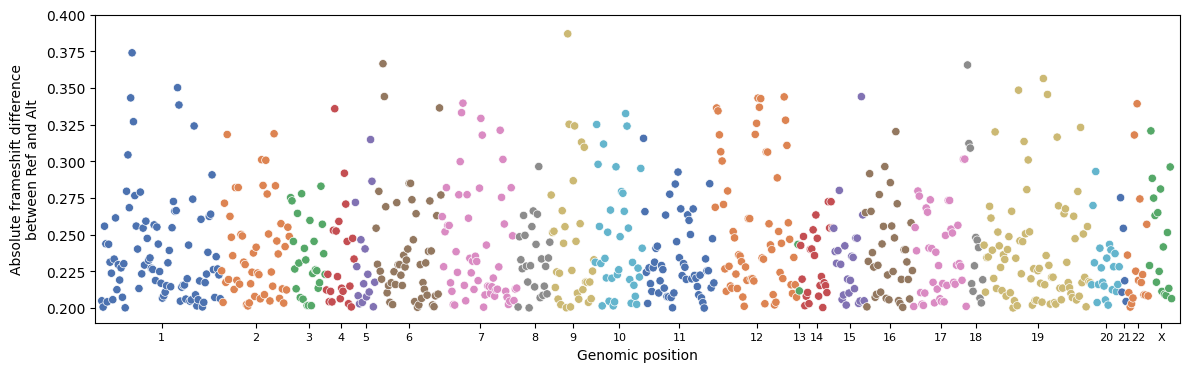

In [9]:
fig, ax = plt.subplots(1,1,figsize=(14,4))
sns.scatterplot(x='plot_loc', y='abs_diff_fs', hue='chrom', data=df, palette=sns.color_palette("deep"))
ax.legend().remove()
ax.set_ylabel('Absolute frameshift difference\nbetween Ref and Alt')
ax.set_ylim(0.19, 0.4)
ax.set_xlabel('Genomic position')
offset = 5
ax.set_xlim(0-offset,len(df)+offset)
_ = ax.set_xticks([tick_locs[i] for i in tick_locs], labels=[str(i) for i in tick_locs], fontsize=8)

In [10]:
df.iloc[0][['AF_eas', 'AF_nfe', 'AF_fin', 'AF_nfe', 'AF_afr', 'AF_asj']].sort_values()

AF_afr    0.144972
AF_asj    0.561383
AF_fin    0.628563
AF_nfe    0.637996
AF_nfe    0.637996
AF_eas    0.658169
Name: 41, dtype: object

In [11]:
# analyze the freqs of ancestries at pop_max vs pop_min
maxs = []
mins = []
for _, row in df.iterrows():
    tmp = row[['AF_eas', 'AF_nfe', 'AF_fin', 'AF_nfe', 'AF_afr', 'AF_asj']].sort_values()
    mins.append(tmp.index[0])
    maxs.append(tmp.index[-1])

In [12]:
from collections import Counter
freq_df = pd.DataFrame({'MaxMAF':Counter(maxs), 'MinMAF':Counter(mins)})
freq_df = freq_df.loc[['AF_nfe', 'AF_fin', 'AF_asj', 'AF_afr', 'AF_eas']]
freq_df.reset_index(inplace=True)
freq_df['index'] = freq_df['index'].map({
    'AF_nfe':'Non-Finnish European', 
    'AF_fin':'Finnish', 
    'AF_asj':'Ashkenazi Jewish',
    'AF_afr':'African/American Aferican',
    'AF_eas':'East Asian'
})

In [13]:
freq_df

,index,MaxMAF,MinMAF
0,Non-Finnish European,59,41
1,Finnish,82,151
2,Ashkenazi Jewish,133,69
3,African/American Aferican,344,133
4,East Asian,159,383


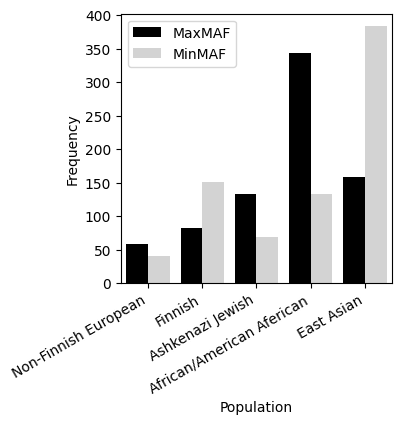

In [14]:
freq_plot_df = freq_df.melt(id_vars='index', value_vars=['MaxMAF', 'MinMAF'])
fig, ax = plt.subplots(1,1,figsize=(3.5,3.5))
sns.barplot(x='index', y='value', hue='variable', data=freq_plot_df, palette=['black', 'lightgrey'])
ax.set_xlabel('Population')
ax.set_ylabel('Frequency')
plt.xticks(rotation=30, ha='right')
ax.legend(title='')